### <i> Predictive Modeling And Early Detection Of Parkinsons Disease Using Machine Learning </i>
### <i> Import Library Files </i>

In [17]:
import pandas as pd
import warnings
import joblib
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


### <i> Dataset Overview </i>

In [23]:
data.items

AttributeError: 'function' object has no attribute 'columns'

In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,154.312848,197.246916,116.332971,0.006221,0.000044,0.003306,0.003428,0.009920,0.029671,0.282587,...,0.047084,0.024880,21.895992,0.754117,0.498054,0.718214,-5.683541,0.226451,2.382126,0.206771
std,17.124313,37.804828,17.953210,0.002001,0.000014,0.001228,0.001140,0.003678,0.007781,0.080554,...,0.012609,0.016717,1.829752,0.178176,0.043021,0.022905,0.451130,0.034527,0.157783,0.037229
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,150.616420,189.666263,112.204966,0.005769,0.000041,0.003012,0.003173,0.009089,0.027992,0.264388,...,0.044325,0.020837,21.550002,0.726172,0.489091,0.713742,-5.779205,0.219263,2.351569,0.199061
50%,154.117666,197.198334,116.100612,0.006188,0.000044,0.003282,0.003397,0.009845,0.029575,0.280555,...,0.046820,0.024486,21.913050,0.758665,0.497781,0.718387,-5.681992,0.226621,2.382482,0.207056
75%,157.491303,204.071906,119.290367,0.006557,0.000046,0.003530,0.003618,0.010552,0.031008,0.296840,...,0.049418,0.027661,22.274815,0.797437,0.506417,0.722957,-5.595197,0.232901,2.411210,0.213564
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### <i> Data PReprocessing </i>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check class distribution
class_counts = data['status'].value_counts()
print(class_counts)

# Optionally, remove classes with very few samples
min_samples = 2  # Set a threshold for minimum samples
classes_to_keep = class_counts[class_counts >= min_samples].index
data_filtered = data[data['status'].isin(classes_to_keep)]

# Separate features and target variable
X = data_filtered.drop(columns=['name', 'status'])
y = data_filtered['status']

# Split the dataset into training and testing sets without stratification if necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the train and test sets
print(f'Train set shape: {X_train_scaled.shape}, Test set shape: {X_test_scaled.shape}')


status
1.000000    147
0.000000     48
0.753214      1
0.758071      1
0.743590      1
           ... 
0.790818      1
0.740938      1
0.758922      1
0.722024      1
0.735387      1
Name: count, Length: 1002, dtype: int64
Train set shape: (156, 22), Test set shape: (39, 22)


### <i> Expolatory Data Analysis </i>

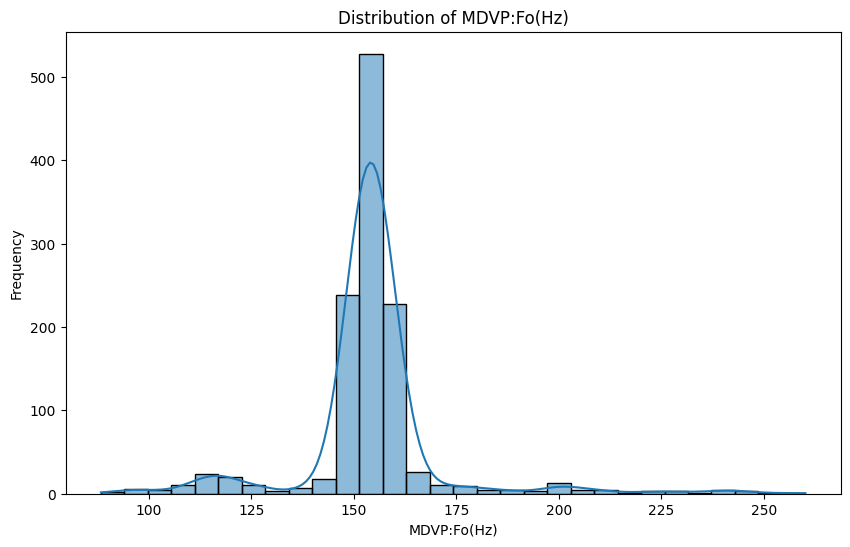

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of a specific feature (e.g., MDVP:Fo(Hz))
plt.figure(figsize=(10, 6))
sns.histplot(data['MDVP:Fo(Hz)'], bins=30, kde=True)
plt.title('Distribution of MDVP:Fo(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.show()

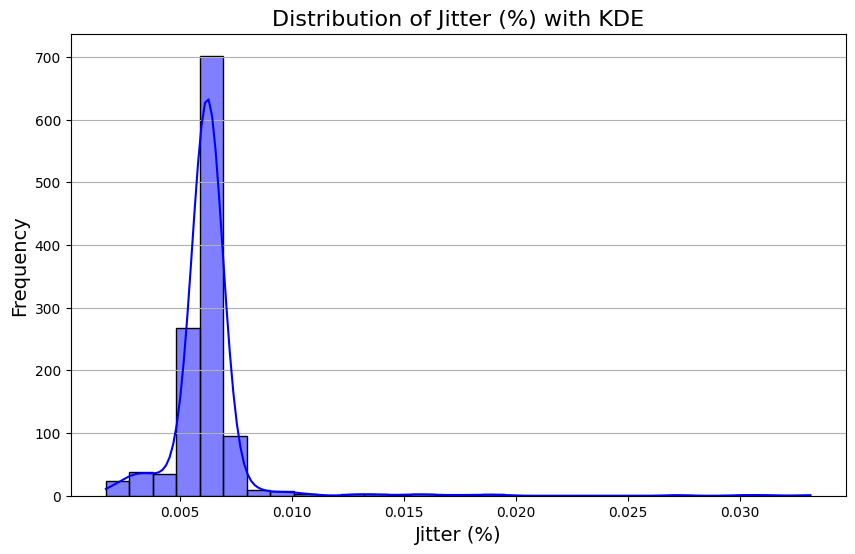

In [9]:
# Distribution of Jitter with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['MDVP:Jitter(%)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Jitter (%) with KDE', fontsize=16)
plt.xlabel('Jitter (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

                  t-statistic       p-value  Significant
MDVP:Fo(Hz)          4.557506  2.657782e-05         True
MDVP:Fhi(Hz)         2.234874  2.843106e-02         True
MDVP:Flo(Hz)         4.310337  6.585434e-05         True
MDVP:Jitter(%)      -5.958777  1.238820e-08         True
MDVP:Jitter(Abs)    -7.329263  7.031183e-12         True
MDVP:RAP            -5.940800  1.301332e-08         True
MDVP:PPQ            -6.534506  5.548357e-10         True
Jitter:DDP          -5.939955  1.307021e-08         True
MDVP:Shimmer        -8.760778  1.063701e-15         True
MDVP:Shimmer(dB)    -8.301212  1.877836e-14         True
Shimmer:APQ3        -8.006212  1.085105e-13         True
Shimmer:APQ5        -8.444370  8.484820e-15         True
MDVP:APQ            -8.997860  3.367273e-16         True
Shimmer:DDA         -8.005909  1.087111e-13         True
NHR                 -3.865849  1.545708e-04         True
HNR                  6.059180  2.424910e-08         True
status                   -inf  

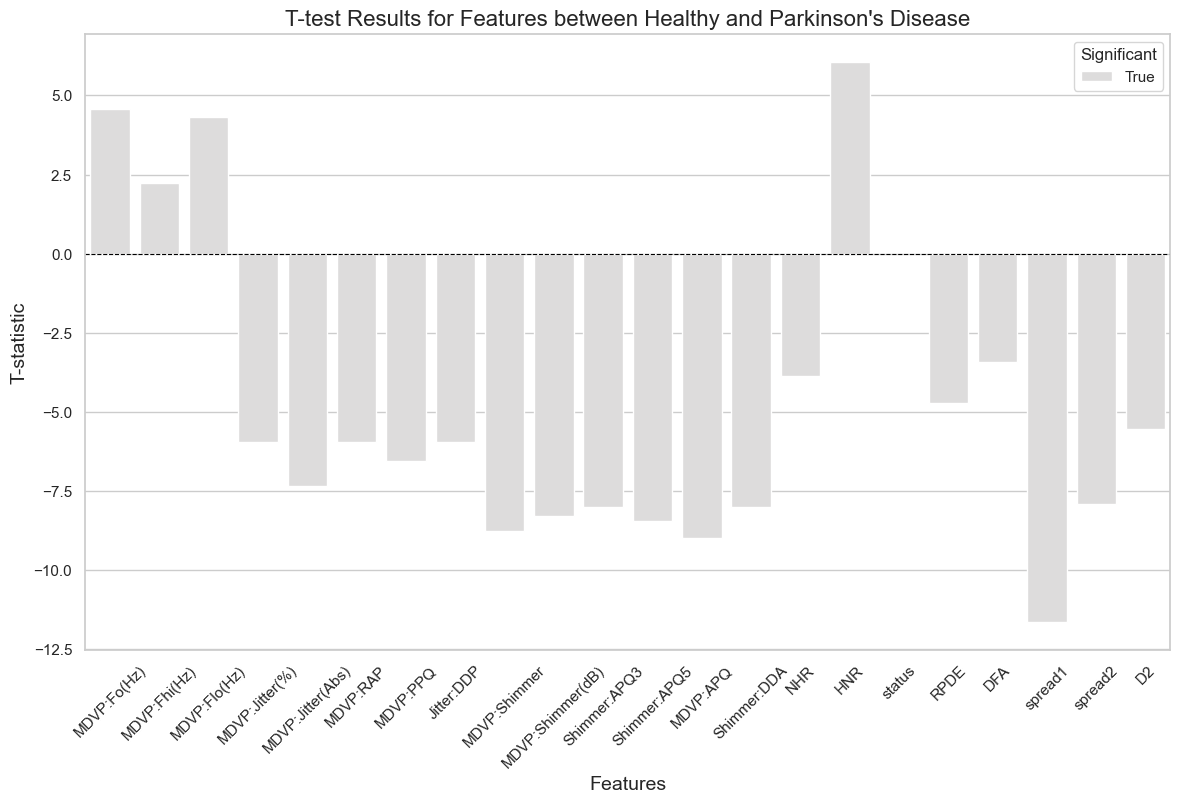

In [10]:
from scipy import stats

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Statistical Analysis: T-test for feature differences between Healthy and Parkinson's
features = data.columns[1:-1]  # Exclude 'name' and 'status'

# Initialize results dictionary
results = {}

for feature in features:
    healthy = data[data['status'] == 0][feature]
    parkinsons = data[data['status'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(healthy, parkinsons, equal_var=False)  # Welch's t-test
    results[feature] = {'t-statistic': t_stat, 'p-value': p_value}

# Convert results to DataFrame for better visualization
t_test_results = pd.DataFrame(results).T
t_test_results['Significant'] = t_test_results['p-value'] < 0.05
print(t_test_results)

# Visualization of statistical differences
plt.figure(figsize=(14, 8))
sns.barplot(x=t_test_results.index, y=t_test_results['t-statistic'], palette='coolwarm', hue=t_test_results['Significant'])
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('T-test Results for Features between Healthy and Parkinson\'s Disease', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('T-statistic', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Significant', loc='upper right')
plt.show()

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Separately printing F1 Score, Precision, and Recall
print("F1 Score:", f1_score(y_test, y_pred_logistic, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_logistic, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_logistic, average='weighted'))


Logistic Regression Model
Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
F1 Score: 0.8799396681749624
Precision: 0.9088319088319088
Recall: 0.8974358974358975


### <i> Random Forest Classifier </i>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Initialize the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model")
print("Accuracy:", accuracy_rf*100)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Separately printing F1 Score, Precision, and Recall
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
joblib.dump(random_forest_model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")

Random Forest Model
Accuracy: 94.87179487179486
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.71      0.83         7
         1.0       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
F1 Score: 0.9452214452214454
Precision: 0.951734539969834
Recall: 0.9487179487179487
Model saved as random_forest_model.pkl


### <i> SVM </i>

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Model")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Separately printing F1 Score, Precision, and Recall
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))


Support Vector Machine Model
Accuracy: 0.8717948717948718
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.57      0.62         7
         1.0       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39

Confusion Matrix:
 [[ 4  3]
 [ 2 30]]
F1 Score: 0.8678500986193294
Precision: 0.8655788655788655
Recall: 0.8717948717948718


In [29]:
!pip install librosa



  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numba-0.60.0-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using cached soundfile-0.13.0-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-win_amd64.whl.metadata (8.6 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:-

In [30]:
!pip install nolds

  Using cached nolds-0.6.1-py2.py3-none-any.whl.metadata (7.0 kB)


In [34]:
import parselmouth
import librosa
import numpy as np
from nolds import dfa
import joblib

def extract_features(wav_file):
    # Load audio file
    sound = parselmouth.Sound(wav_file)
    y, sr = librosa.load(wav_file, sr=None)
    
    # Fundamental frequency and related
    # Fixed: removed return_periodicity parameter as it's not supported
    pitch = librosa.pyin(y, fmin=75, fmax=500)[0]
    
    if pitch is not None and len(pitch[~np.isnan(pitch)]) > 0:  # Handle cases where pitch is not detected
        valid_pitch = pitch[~np.isnan(pitch)]
        fo = np.mean(valid_pitch)  # Fundamental frequency
        fhi = np.max(valid_pitch)  # Maximum frequency
        flo = np.min(valid_pitch)  # Minimum frequency
    else:
        fo = fhi = flo = 0  # Default to zero if no pitch detected

    # Jitter and shimmer
    try:
        point_process = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 500)
        jitter_percent = parselmouth.praat.call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
        jitter_abs = parselmouth.praat.call(point_process, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
        rap = parselmouth.praat.call(point_process, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
        ppq = parselmouth.praat.call(point_process, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
        ddp = 3 * rap
    except:
        jitter_percent = jitter_abs = rap = ppq = ddp = 0

    try:
        shimmer = parselmouth.praat.call([sound, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3)
        shimmer_db = parselmouth.praat.call([sound, point_process], "Get shimmer (local, dB)", 0, 0, 0.0001, 0.02, 1.3)
        apq3 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3)
        apq5 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3)
        apq = parselmouth.praat.call([sound, point_process], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3)
        dda = 3 * apq3
    except:
        shimmer = shimmer_db = apq3 = apq5 = apq = dda = 0

    # Noise-to-Harmonics and Harmonics-to-Noise Ratio
    try:
        harmonicity = sound.to_harmonicity_ac()
        hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)
        nhr = 1 / (hnr + 1e-6) if hnr > 0 else 0
    except:
        hnr = nhr = 0

    # RPDE, DFA, spread1, spread2, D2, PPE
    try:
        dfa_val = dfa(y)
    except:
        dfa_val = 0
        
    if pitch is not None and len(pitch[~np.isnan(pitch)]) > 1:
        valid_pitch = pitch[~np.isnan(pitch)]
        spread1 = np.std(valid_pitch)
        spread2 = np.mean(np.diff(valid_pitch))
        d2 = np.var(valid_pitch)
        ppe = np.std(np.log(valid_pitch + 1e-6))
    else:
        spread1 = spread2 = d2 = ppe = 0

    # Combine all features into a single array
    features = [
        fo, fhi, flo, jitter_percent, jitter_abs, rap, ppq, ddp,
        shimmer, shimmer_db, apq3, apq5, apq, dda, nhr, hnr, 0,  # status is not calculable from audio
        0, dfa_val, spread1, spread2, d2, ppe
    ]
    return np.array(features)

# Example Usage
if __name__ == "__main__":
    wav_file_path = "temp_audio.wav"
    features = extract_features(wav_file_path)
    print("Extracted Features:", features)

Extracted Features: [ 7.92864939e+01  8.27384117e+01  7.54344706e+01  8.06876276e-02
  3.76002605e-04  5.69987781e-02  6.68795465e-02  1.70996334e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.84980391e-01  2.59753389e+00
  0.00000000e+00  0.00000000e+00  2.47881429e-02  2.19164977e+00
 -5.03157687e-01  4.80332869e+00  2.77834705e-02]


In [39]:
import parselmouth
import librosa
import numpy as np
from nolds import dfa
import joblib

def extract_features_improved(wav_file):
    """
    Improved feature extraction with corrected feature count and Praat commands
    """
    # Load audio file
    sound = parselmouth.Sound(wav_file)
    y, sr = librosa.load(wav_file, sr=None)
    
    # Pitch analysis
    pitch = librosa.pyin(y, fmin=75, fmax=500)[0]
    
    if pitch is not None and len(pitch[~np.isnan(pitch)]) > 0:
        valid_pitch = pitch[~np.isnan(pitch)]
        fo = np.mean(valid_pitch)
        fhi = np.max(valid_pitch)
        flo = np.min(valid_pitch)
    else:
        fo = fhi = flo = 0
    
    # Improved shimmer and jitter calculation
    try:
        # Create pitch object for more accurate measurements
        pitch_obj = sound.to_pitch()
        pulses = parselmouth.praat.call([sound, pitch_obj], "To PointProcess (cc)")
        
        # Jitter measurements with corrected parameters
        jitter_percent = parselmouth.praat.call(pulses, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
        jitter_abs = parselmouth.praat.call(pulses, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
        rap = parselmouth.praat.call(pulses, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
        ppq = parselmouth.praat.call(pulses, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
        ddp = 3 * rap
        
        # Improved shimmer calculations with corrected parameters
        shimmer = parselmouth.praat.call([sound, pulses], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
        shimmer_db = parselmouth.praat.call([sound, pulses], "Get shimmer (local, dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
        apq3 = parselmouth.praat.call([sound, pulses], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
        apq5 = parselmouth.praat.call([sound, pulses], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
        apq = parselmouth.praat.call([sound, pulses], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
        dda = 3 * apq3
        
    except Exception as e:
        print(f"Error in jitter/shimmer calculation: {str(e)}")
        jitter_percent = jitter_abs = rap = ppq = ddp = 0
        shimmer = shimmer_db = apq3 = apq5 = apq = dda = 0
    
    # Noise measurements
    try:
        harmonicity = sound.to_harmonicity_ac()
        hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)
        nhr = 1 / (hnr + 1e-6) if hnr > 0 else 0
    except:
        hnr = nhr = 0
    
    # Additional measures
    try:
        dfa_val = dfa(y)
    except:
        dfa_val = 0
    
    if pitch is not None and len(pitch[~np.isnan(pitch)]) > 1:
        valid_pitch = pitch[~np.isnan(pitch)]
        spread1 = np.std(valid_pitch)
        spread2 = np.mean(np.diff(valid_pitch))
        d2 = np.var(valid_pitch)
        ppe = np.std(np.log(valid_pitch + 1e-6))
    else:
        spread1 = spread2 = d2 = ppe = 0
    
    # Create feature array with exactly 22 features (removed one status feature)
    features = [
        fo, fhi, flo, jitter_percent, jitter_abs, rap, ppq, ddp,
        shimmer, shimmer_db, apq3, apq5, apq, dda, nhr, hnr,
        0,  # Single status feature
        dfa_val, spread1, spread2, d2, ppe
    ]
    return np.array(features)

def predict_parkinsons(features, model_path='parkinsons_model.pkl'):
    """
    Make prediction using the extracted features
    """
    try:
        # Load model
        model = joblib.load(model_path)
        
        # Prepare features
        features_2d = features.reshape(1, -1)
        
        # Make prediction
        prediction = model.predict(features_2d)
        probability = model.predict_proba(features_2d)[0][1] * 100
        
        return prediction[0], probability
        
    except Exception as e:
        print(f"Prediction error: {str(e)}")
        return None, None

def analyze_audio(wav_file, model_path='random_forest_model.pkl'):
    """
    Complete analysis function that extracts features and makes prediction
    """
    # Extract features using improved method
    print("Extracting features...")
    features = extract_features_improved(wav_file)
    
    print("\nExtracted features shape:", features.shape)
    print("Features:", features)
    
    # Make prediction
    print("\nMaking prediction...")
    prediction, probability = predict_parkinsons(features, model_path)
    
    # Print results
    print("\nResults:")
    print_prediction_results(prediction, probability, features)

def print_prediction_results(prediction, probability, features):
    """
    Helper function to print prediction results
    """
    if prediction is not None:
        result = "Parkinson's Disease Detected" if prediction == 1 else "No Parkinson's Disease Detected"
        print(f"Prediction: {result}")
        if probability is not None:
            print(f"Confidence: {probability:.2f}%")
        
        print("\nKey measurements:")
        print(f"Fundamental frequency (F0): {features[0]:.2f} Hz")
        print(f"Jitter local: {features[3]:.4f}%")
        print(f"Shimmer local: {features[8]:.4f}%")
        print(f"HNR: {features[15]:.2f}")
        print(f"DFA: {features[17]:.4f}")
    else:
        print("Prediction failed")

# Example usage
if __name__ == "__main__":
    wav_file_path = "temp_audio.wav"
    analyze_audio(wav_file_path)

Extracting features...
Error in jitter/shimmer calculation: Command "Get shimmer (local, dB)" not available for given objects.

Extracted features shape: (22,)
Features: [ 7.92864939e+01  8.27384117e+01  7.54344706e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.84980391e-01  2.59753389e+00
  0.00000000e+00  1.05779132e-02  2.19164977e+00 -5.03157687e-01
  4.80332869e+00  2.77834705e-02]

Making prediction...

Results:
Prediction: Parkinson's Disease Detected
Confidence: 64.00%

Key measurements:
Fundamental frequency (F0): 79.29 Hz
Jitter local: 0.0000%
Shimmer local: 0.0000%
HNR: 2.60
DFA: 0.0106
